<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [87]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy

from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [103]:
# read in the job_listings CSV
df = pd.read_csv('./data/job_listings.csv')

print(df.shape)
df.head()

(426, 3)


,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [104]:
from bs4 import BeautifulSoup
import requests

# define function that cleans up HTML using BS
def clean_description(desc):
    soup = BeautifulSoup(desc)
    return soup.get_text()

In [105]:
# apply above function to 'description' column and add new column with cleaned text
df['clean_desc'] = df['description'].apply(clean_description)

df.head()

,Unnamed: 0,description,title,clean_desc
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [106]:
# put title in lower case so we can subset data based on if the title has "data scientist"
df['title'] = df['title'].apply(str.lower)

df.head()

,Unnamed: 0,description,title,clean_desc
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,data scientist i,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,data scientist - entry level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",data scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,data scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [107]:
# Subset the data for jobs that contrain the title "data scientist"

phrase = 'data scientist'

df_DS = df[df['title'].str.contains(phrase)].copy()

In [108]:
df_DS.head()

,Unnamed: 0,description,title,clean_desc
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,data scientist i,"b'Job Description\n\nAs a Data Scientist 1, yo..."
2,2,b'<div><p>As a Data Scientist you will be work...,data scientist - entry level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",data scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,data scientist,b'Location: USA \xe2\x80\x93 multiple location...


In [98]:
df_DS['clean_desc'] = df_DS['clean_desc'].astype(str)

In [112]:
# remove '\n' (escape sequence) from clean_desc column
# https://www.ntu.edu.sg/home/ehchua/programming/howto/Regexe.html

df_DS['clean_desc'] = df_DS['clean_desc'].replace(r'\\n',' ', regex=True)

df_DS.head()

,Unnamed: 0,description,title,clean_desc
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",data scientist,"b""Job Requirements: Conceptual understanding i..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,data scientist i,"b'Job Description As a Data Scientist 1, you ..."
2,2,b'<div><p>As a Data Scientist you will be work...,data scientist - entry level,b'As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",data scientist,"b'$4,969 - $6,756 a monthContractUnder the gen..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,data scientist,b'Location: USA \xe2\x80\x93 multiple location...


## 2) Use Spacy to tokenize the listings 

In [113]:
import spacy

# load the pre-trained model 
nlp = spacy.load("en_core_web_lg")

# Lemma Function
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

# apply lemma function to the clean_desc column
df_DS['lemma_tokens'] = df_DS['clean_desc'].apply(get_lemmas)

df_DS.head()

,Unnamed: 0,description,title,clean_desc,lemma_tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",data scientist,"b""Job Requirements: Conceptual understanding i...","[b""Job, requirement, conceptual, understanding..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,data scientist i,"b'Job Description As a Data Scientist 1, you ...","[b'Job, Description, , Data, scientist, 1, he..."
2,2,b'<div><p>As a Data Scientist you will be work...,data scientist - entry level,b'As a Data Scientist you will be working on c...,"[b'As, Data, scientist, work, consult, busines..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",data scientist,"b'$4,969 - $6,756 a monthContractUnder the gen...","[b'$4,969, $, 6,756, monthcontractunder, gener..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,data scientist,b'Location: USA \xe2\x80\x93 multiple location...,"[b'Location, USA, \xe2\x80\x93, multiple, loca..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [114]:
from sklearn.feature_extraction.text import CountVectorizer

# create the transformer
vect = CountVectorizer(stop_words='english', max_features=1000)

# build the vocab
vect.fit(df_DS['clean_desc'])

# transform the text
dtm = vect.transform(df_DS['clean_desc'])

# get word counts for each document and turn into dataframe
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())

dtm.head()

,000,10,100,12,2019,40,abilities,ability,able,academic,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0,0,0,0,0,0,0,2,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,2,0,0,0,0,8,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [115]:
dtm.shape

(406, 1000)

In [116]:
df_DS.shape

(406, 5)

## 4) Visualize the most common word counts

In [121]:
from collections import Counter
import squarify

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

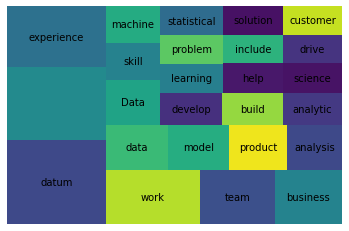

In [122]:
# Visualize the counts of tokens

wc = count(df_DS['lemma_tokens'])

wc_top25 = wc[wc['rank'] <= 25]

squarify.plot(sizes=wc_top25['pct_total'], label=wc_top25['word'])
plt.axis('off')
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [124]:
from sklearn.feature_extraction.text import TfidfVectorizer

# instantitate the vectorizer object
tfidf = TfidfVectorizer(stop_words='english', max_features=1000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(df_DS['clean_desc'])

# Print Word Counts

# Get feature names to use as df column headers
dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

# view feature matrix as a dataframe
dtm.head()

,000,10,100,12,2019,40,abilities,ability,able,academic,...,xa6,xae,xb7,xbb,xc2,xe2,xef,year,years,york
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.158515,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.206221,0.000000,0.0,0.000000,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028149,0.0,0.0,...,0.142875,0.0,0.0,0.0,0.000000,0.188135,0.0,0.053763,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081098,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.097939,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.000000,0.133331,0.0,0.000000,0.143718,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [165]:
from sklearn.neighbors import NearestNeighbors

# fit the model on DTM
nn = NearestNeighbors(n_neighbors=5, algorithm='kd_tree')
nn.fit(dtm)

NearestNeighbors(algorithm='kd_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [166]:
# Query
nn.kneighbors([dtm.iloc[95].values])

(array([[0.        , 0.        , 0.8294818 , 0.95724092, 0.95958754]]),
 array([[ 95,  61, 256, 125, 308]], dtype=int64))

In [169]:
df_DS['clean_desc'].iloc[95][:400]

"b'At Uber, we ignite opportunity by setting the world in motion. We take on big problems to help drivers, riders, delivery partners, and eaters get moving in more than 600 cities around the world.  We welcome people from all backgrounds who seek the opportunity to help build a future where everyone and everything can move independently. If you have the curiosity, passion, and collaborative spirit,"

In [170]:
df_DS['clean_desc'].iloc[256][:400]

'b"At Uber, we ignite opportunity by setting the world in motion. We take on big problems to help drivers, riders, delivery partners, and eaters get moving in more than 600 cities around the world.  We welcome people from all backgrounds who seek the opportunity to help build a future where everyone and everything can move independently. If you have the curiosity, passion, and collaborative spirit,'

In [171]:
job_description = ['''
The Orlando Magic organization is looking for a hard-working, loyal, and observant 
individual who doesn't mind working behind the scenes. We are looking for well-qualfied 
people who are looking to break into the sports data industry.

While we offer the option to work remotely, you will be provided with ample opportuity to 
travel to over 25 cities in the U.S. and Canada. The Orlando Magic organization has been a 
leader in the NBA for a very long time, and we are looking for a young professional who 
will elevate that status. 

You will work collaboratively with many different departments, have the freedom to bring new, 
innovative ideas to the table, and learn from some of the best data scientists in the industrt. 
Our benefits are very competitive, and our bonus structure is second to none. 

During the season, the hours are long and rigourous. However, we excercise flexibility in time off 
to those that put in the hours and provide effective work. You will be rewarded for your hard work. 
Come help the Orlando Magic increase its competitive advantage over the rest of the NBA by analyzing 
data and finding valuable insights.
''']

In [172]:
job_listing = tfidf.transform(job_description)

In [173]:
job_listing

<1x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 36 stored elements in Compressed Sparse Row format>

In [175]:
nn.kneighbors(job_listing.todense())

(array([[1.25025999, 1.25025999, 1.2528087 , 1.26445137, 1.26688383]]),
 array([[162, 320, 385, 137, 104]], dtype=int64))

In [180]:
df_DS['clean_desc'].iloc[162]

"b'About Spin  Spin operates electric scooters in cities and campuses nationwide, bringing sustainable last-mile mobility solutions to diverse communities. Recognized for its consistent cooperation and collaboration with cities, Spin partners closely with transportation planners, elected officials, community groups, and university administrators to bring stationless mobility options to streets in a responsible and carefully orchestrated manner.  Based in San Francisco, Spin is a diverse team of engineers, designers, urban planners, policymakers, lawyers and operators with experience from Y Combinator, Lyft, Uber, local and federal government, and the transportation advocacy world. Spin was known for launching the first stationless mobility program in Seattle, and has since expanded to become the exclusive electric scooter partner in mid-sized cities like Coral Gables, Florida and Lexington, Kentucky, and one of a few permitted scooter operators in large cities like Denver, Detroit, and

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 